# Исследование объявлений о продаже квартир

**Контекст** - имеется архив объявлений с сайта недвижимости о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Задача** - установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы

1. Открыть файл и изучить общую информацию;
2. Обработать пропуски, заменить типы данных, обработать дубликаты;
3. Посчитать и добавить в таблицу необходимые столбцы; 
4. Провести исследовательский анализ данных:
  - Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра;
  - Изучить время продажи квартиры и построить гистограмму. Убрать редкие и выбивающиеся значения и описать, какие особенности обнаружены;
  - Проанализировать, какие факторы больше всего влияют на стоимость квартиры;
  - Выбрать 10 населённых пунктов с наибольшим числом объявлений и посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья;
  - Выяснить, какая область Санкт-Петербурга входит в центр; 
  - Проанализировать сегмент квартир в центре и выделить факторы, которые влияют на стоимость квартиры. Сравнить с общими выводами по всему городу;
5. Сделать общий вывод.

## Шаг 1. Изучение общей информации

In [82]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [83]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [84]:
#Прочитаем файл и посморим на первые строки
df_raw = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df_raw.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [85]:
#Выведем названия столбцов
df_raw.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [86]:
#Создадим новый датафрейм только с необходимыми столбцами
df = df_raw[['last_price', 'total_area', 'first_day_exposition',
             'rooms', 'ceiling_height', 'floors_total', 'living_area',
             'floor', 'kitchen_area', 'locality_name', 
             'cityCenters_nearest','days_exposition' ]].copy()

#Изучим основную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
kitchen_area            21421 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.2+ MB


In [87]:
#Посмотрим на базовую статистику
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
last_price,23699,NaN,NaN,NaN,6.54155e+06,1.0887e+07,12190,3.4e+06,4.65e+06,6.8e+06,7.63e+08
total_area,23699,NaN,NaN,NaN,60.3487,35.6541,12,40,52,69.9,900
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23699,NaN,NaN,NaN,2.07064,1.0784,0,1,2,3,19
ceiling_height,14504,NaN,NaN,NaN,2.7715,1.26106,1,2.52,2.65,2.8,100
floors_total,23613,NaN,NaN,NaN,10.6738,6.59717,1,5,9,16,60
living_area,21796,NaN,NaN,NaN,34.4579,22.0304,2,18.6,30,42.3,409.7
floor,23699,NaN,NaN,NaN,5.89236,4.88525,1,2,4,8,33
kitchen_area,21421,NaN,NaN,NaN,10.5698,5.90544,1.3,7,9.1,12,112
locality_name,23650,364,Санкт-Петербург,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

Предварительное ознакомление с данными показывается, что в таблице 23699 строки и 22 столбца. Количество столбцов несколько ухудшает читабельность и выводить первые строки не так уж удобно. Для ответа на поставленные вопросы нет необходимости сохранять все столбцы, кроме того надо будет еще несколько добавить. Поэтому был сделан новый датафрейм с теми столбцами, с которыми мы будем работать:
- last_price,
- total_area,
- first_day_exposition,
- rooms,
- ceiling_height,
- floors_total,
- living_area,
- floor,
- kitchen_area,
- locality_name,
- cityCenters_nearest,
- days_exposition.

В таблице достаточно много пропусков, они встречаются в следующих столбцах:
- ceiling_height - вероятно не были предоставлены владельцами квартир; можно заполнить медианами, предварительно определив подходящую группировку;
- floors_total - вероятно не были предоставлены владельцами квартир; можно заполнить медианами, предварительно сгруппировав по этажам;
- living_area - вероятно не были предоставлены владельцами квартир; данные об общей площади есть везде, следовательно жилую площадь можно заполнить медианами, приняв во внимание соотношение жилой и общей;
- kitchen_area - вероятно не были предоставлены владельцами квартир; так же заполнить медианами, приняв во внимание соотношение кухни и общей;
- locality_name - вероятно не были предоставлены владельцами квартир; необходимо исследовать столбец на разные варианты написания одного и того же, а пропуски заполнить "неизвестно", чтобы затем преобразовать в категории;
- cityCenters_nearest - вероятно, не были получены автоматически; можно заполнить медианами, сгруппировав по locality_name; 
- days_exposition - можно оставить без изменения.

Надо будет произвести замену типа данны:
- в int: last_price, floors_total, cityCenters_nearest;
- в datetime: first_day_exposition;
- в category: locality_name.

## Шаг 2. Предобработка данных

### Обработка пропущенных значений

In [88]:
#Посмотрим, где и сколько есть пропусков
df.isnull().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
kitchen_area            2278
locality_name             49
cityCenters_nearest     5519
days_exposition         3181
dtype: int64

Пойдем от меньшего количества пропусков к большему.

#### Столбец locality_name

In [89]:
#Посмотрим несколько уникальных значений
df.locality_name.unique()[:30]

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов'], dtype=object)

In [90]:
#Проверим, если ли дубликаты значений из-за разного регистра в столбце locality_name 
#Если нет, не будет приводить к нижнему регистру для сохранения читаемости
df_location = df[['locality_name']]
print(df_location.nunique())
df_location.nunique() == df_location['locality_name'].str.lower().nunique()

locality_name    364
dtype: int64


locality_name    True
dtype: bool

In [91]:
#Сделаем срез по посёлкам и посмотрим, есть ли повторяющиеся значения
df[df.locality_name.str.contains("посёлок") | df.locality_name.str.contains("поселок")]['locality_name']\
.sort_values().unique()[:30]

array(['городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
       'коттеджный поселок Кивеннапа Север', 'коттеджный поселок Счастье',
       'коттеджный посёлок Лесное', 'поселок Аннино', 'поселок Барышево',
       'поселок Бугры', 'поселок Возрождение', 'поселок Войсковицы',
       'поселок Володарское', 'поселок Гаврилово', 'поселок Гарболово',
       'поселок Гладкое', 'поселок Глажево', 'поселок Глебычево',
       'поселок Гончарово', 'поселок Громово'], dtype=object)

В значениях много посёлков, при этом есть два варианта написания - "посёлок" и "поселок", а место может быть одно и то же, например 'городской поселок Янино-1'. Необходимо привести к одному виду, чтобы избежать дублирования. 

In [92]:
#Заменим на один вид написания - посёлок и посмотрим количество уникальных значений
df['locality_name'] = df.locality_name.str.replace('поселок', 'посёлок')
df.locality_name.nunique()

330

Благодаря замене количество уникальных значений уменьшилось на 34.

In [93]:
#Заменим пропуски
df['locality_name'] = df['locality_name'].fillna('Неизвестно')
df.locality_name.isnull().sum()

0

#### Столбец floors_total

In [94]:
#Сгруппируем по этажам и посмотрим среднее и медиану
df.groupby('floor')['floors_total'].agg(['mean', 'median'])

,mean,median
floor,,
1,6.879547,5.0
2,7.476233,5.0
3,7.999674,5.0
4,7.994273,5.0
5,8.330531,6.0
6,11.607253,9.0
7,12.292422,10.0
8,12.669767,10.0
9,13.022945,10.0


In [95]:
#Заменим пропуски на медианы, чтобы не принимать во внимание выбросы, и проверим
df['floors_total'] = df.groupby(['floor']).floors_total.apply(lambda x: x.fillna(x.median()))
df.floors_total.isnull().sum()

0

#### Столбец living_area

In [96]:
#Добавим столбец соотношения жилой площади к общей на основе имеющихся данных
df['living_total_ratio'] = (df.living_area / df.total_area)

#Заполним пропуски с помощью total_area*медиану по столбцу living_total_ratio
df['living_area'] = df['living_area'].fillna(df['total_area']*df['living_total_ratio'].median())
df['living_area'].isnull().sum()

0

#### Столбец kitchen_area

Заполним пропуски по той же логике, что и living_area.

In [97]:
#Добавим столбец соотношения кухни к общей на основе имеющихся данных
df['kitchen_total_ratio'] = (df.kitchen_area / df.total_area)

#Заполним пропуски с помощью  total_area*медиану по столбцу kitchen_total_ratio
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*df['kitchen_total_ratio'].median())
df['kitchen_area'].isnull().sum()

0

#### Столбец cityCenters_nearest

In [98]:
#Посмотрим количество местоположений квартир с пропусками cityCenters_nearest
df.query('cityCenters_nearest.isnull() == True')['locality_name'].nunique()

#Из них по Петербургу
len(df.query('locality_name == "Санкт-Петербург" & cityCenters_nearest.isnull() == True'))

#И по остальным населенным пунктам
len(df.query('locality_name != "Санкт-Петербург" & cityCenters_nearest.isnull() == True'))

313

61

5458

In [99]:
#Агрегирует по нас.пунктам и посмотрим статистику cityCenters_nearest
df.query('cityCenters_nearest.notnull() == True')\
.groupby('locality_name')['cityCenters_nearest'].agg(['mean', 'median', 'first', 'last']).head(10)

,mean,median,first,last
locality_name,,,,
Зеленогорск,54617.583333,53381.0,53104.0,54490.0
Колпино,32113.771513,32018.0,32321.0,30473.0
Красное Село,30020.284091,29140.5,29514.0,41718.0
Кронштадт,49195.726316,49575.0,49984.0,46979.0
Ломоносов,50739.969697,51677.0,51677.0,51818.0
Неизвестно,11278.902439,8943.0,4258.0,8943.0
Павловск,33206.921053,32683.0,32900.0,35053.0
Петергоф,35468.925373,33771.0,33058.0,34104.0
Пушкин,28745.375000,27930.5,30759.0,27977.0


Значения столбца указаны в метрах, что показывает достаточно высокую точность местоположения. Логично предположить, что в одном районе они будут примерно одинаковы. Поэтому сначала сгруппируем по locality_name и заполним медианами

In [100]:
#Предварительно сгруппируем данные по locality_name и заполним медианами
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest']\
                              .apply(lambda x: x.fillna(x.median()))

#Проверим, сколько осталось пропусков
print('Осталось всего:', df['cityCenters_nearest'].isnull().sum())
print('по Петербургу:', len(df.query('locality_name == "Санкт-Петербург" & cityCenters_nearest.isnull() == True')))
print('по остальным нас.пунктам:', len(df.query('locality_name != "Санкт-Петербург" & cityCenters_nearest.isnull() == True')))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Осталось всего: 4864
по Петербургу: 0
по остальным нас.пунктам: 4864


Осталось достаточно много пропусков в небольших населенных пунктах, заполним их медианой

In [101]:
#Сохраним медиану отдельно и потом заполним
suburbs_median = df.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].median()
df.loc[df['locality_name'] != 'Санкт-Петербург','cityCenters_nearest'] = \
(df.loc[df['locality_name'] != 'Санкт-Петербург','cityCenters_nearest'].fillna(suburbs_median))

#Проверим количество пропусков
df['cityCenters_nearest'].isnull().sum()

0

#### Столбец ceiling_height

In [102]:
#Посмотрим на уникальные значения
df.ceiling_height.unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Изучение уникальных значений показывает, что встречаются такие, как 26, 27, 34, и даже 100, что очень похоже на то, что была пропущена запятая, так как в противном случае сложно представить квартиры с такими потолками. Поделим такие значения на 10. Возьмем порог от 20 , так как 2 метра может быть потолок в мансардном этаже.

In [103]:
#Выберем значения столбца больше или равно 20 и поделим на 10 и проверим, что получилось
df.loc[(df['ceiling_height'] >= 20), 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

In [104]:
#Посмотрим, какие есть очень маленькие значения
df[df['ceiling_height'] < 2]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,living_total_ratio,kitchen_total_ratio
5712,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,5.20,городской посёлок Мга,28796.0,248.0,0.642523,0.121495
16934,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,8.34,Санкт-Петербург,20444.0,71.0,0.435000,0.208500
22590,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,10.00,Санкт-Петербург,14217.0,13.0,0.589091,0.181818


Подобные маленькие значения выглядят неправдоподобно, возможно при вводе вместо 2 встала 1. Однако таких значений всего три, можно их оставить, как есть. 

In [105]:
#Посчитаем количество пропущенных значений
ceil_null = df['ceiling_height'].isnull().sum()
ceil_null/len(df)

0.38799105447487237

Пропущенных значений достаточно много (ок. 39%). 
Предположим, что высота потолков может зависеть от местоположения. Более подробные данные находятся в столбце cityCenters_nearest. Сделаем по нему группировку и заполним медианами.

<Figure size 720x360 with 0 Axes>

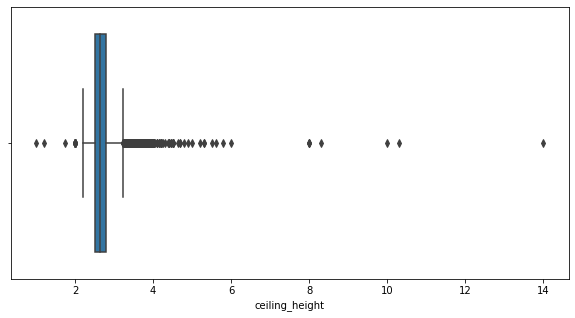

0.10    2.5000
0.20    2.5000
0.30    2.5500
0.40    2.6000
0.50    2.6500
0.60    2.7000
0.70    2.7500
0.80    2.8500
0.90    3.0500
0.95    3.2985
0.99    3.7800
Name: ceiling_height, dtype: float64

In [106]:
#Посмотрим распределение значений, построим boxplot и выведем персентили
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=df.ceiling_height, orient='h')
plt.show()
df['ceiling_height'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99])

99% квартир имеют потолки не выше 3.78, но дальше значения растут постепенно до 6 м, и только потом видны очевидные выбросы на 8, 10 и 14 метрах. Предположим, что высота потолков может зависеть от местоположения. 

In [107]:
#Мы видим, что среднее по местоположению различается, поэтому заполним пропуски, сгруппировав данные
df['ceiling_height'] = df.groupby('cityCenters_nearest')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

#Проверим, остались ли пропуски
df['ceiling_height'].isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


2171

In [108]:
#Мы видим, что еще осталось 2171 пропусков - это те, где вообще нет данных по высоте потолков
#Заполним их медианой по всем значениям ceiling_height
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

#Проверим, остались ли теперь пропуски
df['ceiling_height'].isnull().sum()

0

#### Вывод

In [109]:
#Проверим наличие пропусков
df.isnull().sum()

#Проверим наличие дубликатов
df.duplicated().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
kitchen_area               0
locality_name              0
cityCenters_nearest        0
days_exposition         3181
living_total_ratio      1903
kitchen_total_ratio     2278
dtype: int64

0

Мы заполнили все те пропуски, что хотели. Для заполнения были использованы различные группировки (по этажам, по нас.пункту, по удаленности от центра) и медианные значения. 

Появились пропуски в столбцах living_total_ratio и kitchen_total_ratio, потому что мы их создавали на неполных данных. Столбцы надо будет пересчитать.

Дубликатов в данных не обнаружено.

### Замена типов данных

In [110]:
#Посмотрим еще раз на типы данных
df.dtypes

last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
kitchen_area            float64
locality_name            object
cityCenters_nearest     float64
days_exposition         float64
living_total_ratio      float64
kitchen_total_ratio     float64
dtype: object

In [111]:
#Заменим на целочисленные 
col_int = ['last_price','floors_total', 'cityCenters_nearest']

for col in col_int:
    df[col] = df[col].astype(int)
    
#Заменим на категории
df['locality_name'] = df['locality_name'].astype('category')

#На datetime
df['date'] = pd.to_datetime(df['first_day_exposition'])

#Проверим
df.dtypes

last_price                       int64
total_area                     float64
first_day_exposition            object
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
kitchen_area                   float64
locality_name                 category
cityCenters_nearest              int64
days_exposition                float64
living_total_ratio             float64
kitchen_total_ratio            float64
date                    datetime64[ns]
dtype: object

In [112]:
#Округлим столбцы для экономии памяти

df['living_area'] = df['living_area'].round(1)
df['kitchen_area'] = df['kitchen_area'].round(1)

#Проверим
df[['living_area', 'kitchen_area']].head()

,living_area,kitchen_area
0,51.0,25.0
1,18.6,11.0
2,34.3,8.3
3,90.3,27.4
4,32.0,41.0


Типы данных заменены и значения округлены для экономии памяти.

## Шаг 3. Добавление столбцов

Посчитаем и добавим в таблицу: 
  - цену квадратного метра; 
  - день недели, месяц и год публикации объявления; 
  - этаж квартиры (первый, последний, другой); 
  - пересчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей после заполнения всех пропусков.

In [113]:
#Добавим необходимые столбцы с временными данными. 
#Для дней и месяцев сделаем в двух вариантах - числовом (для группировок) и словом (для читаемости)
df['weekday'] = df['date'].dt.weekday.astype('category')
df['weekday_name'] = df['date'].dt.day_name().astype('category')
df['month'] = df['date'].dt.month.astype('category')
df['month_name'] = df['date'].dt.month_name().astype('category')
df['year'] = df['date'].dt.year.astype('category')

#Проверим
df.loc[:10, 'date':]

,date,weekday,weekday_name,month,month_name,year
0,2019-03-07,3,Thursday,3,March,2019
1,2018-12-04,1,Tuesday,12,December,2018
2,2015-08-20,3,Thursday,8,August,2015
3,2015-07-24,4,Friday,7,July,2015
4,2018-06-19,1,Tuesday,6,June,2018
5,2018-09-10,0,Monday,9,September,2018
6,2017-11-02,3,Thursday,11,November,2017
7,2019-04-18,3,Thursday,4,April,2019
8,2018-05-23,2,Wednesday,5,May,2018
9,2017-02-26,6,Sunday,2,February,2017


In [114]:
#Добавим рассчеты стоимости квадратного метра 
df['square_metre_price'] = (df['last_price'] / df['total_area']).astype(int)

#Пересчитаем соотношение жилой площади и кухни к общей площади и округлим 
df['living_total_ratio'] = (df.living_area / df.total_area)
df['living_total_ratio'] = df['living_total_ratio'].round(2)

df['kitchen_total_ratio'] = (df.kitchen_area / df.total_area)
df['kitchen_total_ratio'] = df['kitchen_total_ratio'].round(2)

#Проверим
df.iloc[:5, 10:]

,cityCenters_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,date,weekday,weekday_name,month,month_name,year,square_metre_price
0,16028,NaN,0.47,0.23,2019-03-07,3,Thursday,3,March,2019,120370
1,18603,81.0,0.46,0.27,2018-12-04,1,Tuesday,12,December,2018,82920
2,13933,558.0,0.61,0.15,2015-08-20,3,Thursday,8,August,2015,92785
3,6800,424.0,0.57,0.17,2015-07-24,4,Friday,7,July,2015,408176
4,8098,121.0,0.32,0.41,2018-06-19,1,Tuesday,6,June,2018,100000


In [115]:
#Создадим столбец с категориями этажей
def floor_cats(row):
    last_floor = row[0]
    current_floor = row[1]
    if current_floor == 1:
        return 'первый'
    elif current_floor == last_floor:
        return 'последний'
    else:
        return 'другое'
    
df['floor_category'] = df[['floors_total', 'floor']].apply(floor_cats, axis = 1).astype('category')

#Проверим
df.floor_category.value_counts()

другое       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [116]:
#Проверим все вместе
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
kitchen_area            23699 non-null float64
locality_name           23699 non-null category
cityCenters_nearest     23699 non-null int64
days_exposition         20518 non-null float64
living_total_ratio      23699 non-null float64
kitchen_total_ratio     23699 non-null float64
date                    23699 non-null datetime64[ns]
weekday                 23699 non-null category
weekday_name            23699 non-null category
month                   23699 non-null category
month_name              23699 non-null catego

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,...,living_total_ratio,kitchen_total_ratio,date,weekday,weekday_name,month,month_name,year,square_metre_price,floor_category
0,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,25.0,Санкт-Петербург,...,0.47,0.23,2019-03-07,3,Thursday,3,March,2019,120370,другое
1,3350000,40.4,2018-12-04T00:00:00,1,2.64,11,18.6,1,11.0,посёлок Шушары,...,0.46,0.27,2018-12-04,1,Tuesday,12,December,2018,82920,первый
2,5196000,56.0,2015-08-20T00:00:00,2,2.64,5,34.3,4,8.3,Санкт-Петербург,...,0.61,0.15,2015-08-20,3,Thursday,8,August,2015,92785,другое
3,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,90.3,9,27.4,Санкт-Петербург,...,0.57,0.17,2015-07-24,4,Friday,7,July,2015,408176,другое
4,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,41.0,Санкт-Петербург,...,0.32,0.41,2018-06-19,1,Tuesday,6,June,2018,100000,другое


Необходимые столбцы созданы, значения округлены.

## Шаг 4. Исследовательский анализ данных 

### 1. Изучение площади, цены, числа комнат, высоты потолков 

#### Предварительный взгляд

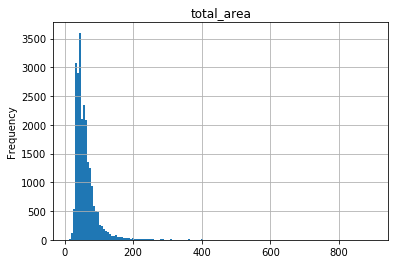

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

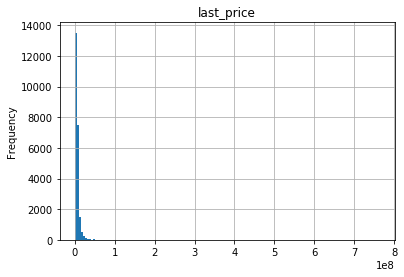

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

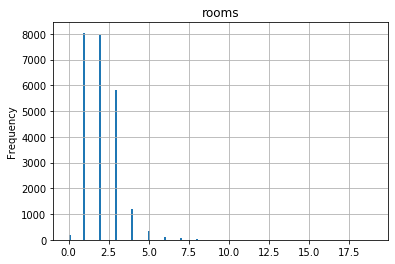

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

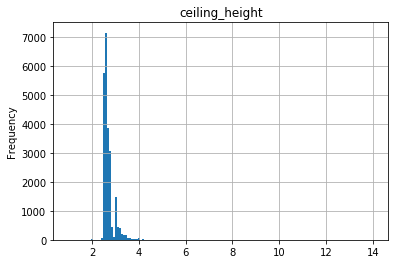

count    23699.000000
mean         2.708769
std          0.283596
min          1.000000
25%          2.560000
50%          2.640000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

In [117]:
# Выделим названия необходимых столбцов, выведем базовую статистику и гистограммы для каждого
cols_hist = ['total_area', 'last_price', 'rooms', 'ceiling_height']


for col in cols_hist:
    ax = df[col].plot(kind='hist', bins=150, title=col, grid=True)
    plt.show()
    df[col].describe()

Все гистограммы скошены вправо, что неудивительно, так как максимальные значения сильно отличаются от средних. Предварительно можно обозначить, что большинство квартир
- имеют общую площать менее 100 кв.м;
- стоят менее 6 млн;
- имеют меньше 4 комнат;
- имеют потолки высотой между 2.5 и 3х метров.

Посмотрим на гистограммы для каждого столбца подробнее.

#### Исследование столбца total_area

In [118]:
#Посмотрим на распределение данных
df.total_area.quantile([.7, .8, .9, .95, .99])

0.70     64.800
0.80     75.000
0.90     93.520
0.95    116.000
0.99    197.214
Name: total_area, dtype: float64

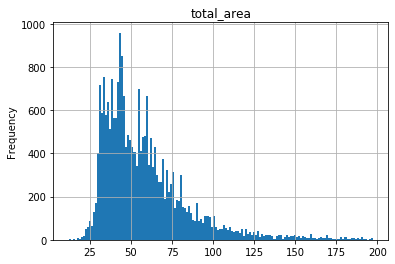

In [119]:
#Построим гистограмму на 99% данных
ax = df.total_area.plot(kind='hist', bins=150, title='total_area', 
                   range=(df.total_area.min(), df.total_area.quantile(.99)), grid=True)

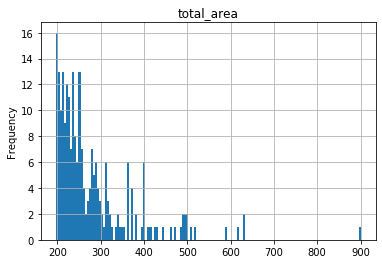

In [120]:
#Построим гистограмму на "хвосте"
ax = df.total_area.plot(kind='hist', bins=150, title='total_area', 
                   range=(df.total_area.quantile(.99), df.total_area.max()), grid=True)

In [121]:
df[df.total_area > 580]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,...,living_total_ratio,kitchen_total_ratio,date,weekday,weekday_name,month,month_name,year,square_metre_price,floor_category
3117,140000000,631.0,2019-03-30T00:00:00,7,3.9,5,358.3,5,60.0,Санкт-Петербург,...,0.57,0.10,2019-03-30,5,Saturday,3,March,2019,221870,последний
5358,65000000,590.0,2019-02-14T00:00:00,15,3.5,6,409.0,3,100.0,Санкт-Петербург,...,0.69,0.17,2019-02-14,3,Thursday,2,February,2019,110169,другое
12859,140000000,631.2,2019-04-09T00:00:00,7,3.9,4,322.3,4,19.5,Санкт-Петербург,...,0.51,0.03,2019-04-09,1,Tuesday,4,April,2019,221799,последний
15651,300000000,618.0,2017-12-18T00:00:00,7,3.4,7,258.0,5,70.0,Санкт-Петербург,...,0.42,0.11,2017-12-18,0,Monday,12,December,2017,485436,другое
19540,420000000,900.0,2017-12-06T00:00:00,12,2.8,25,409.7,25,112.0,Санкт-Петербург,...,0.46,0.12,2017-12-06,2,Wednesday,12,December,2017,466666,последний


График по всем данным показывает, что в основном общая площадь квартир не превышает примерно 200 метров. Это подтвержается, если посмотреть на состав значений, использую quantile(), видно, что 99% данных лежит в пределах от 12 до 197 кв. метров, при этом малое количество квартир уже имеют площадь более 125 кв. метров (95% квартир имеют площадь не более 116 кв.м). На графике видно, что значения "вытягиваются" вправо и в основном обрываются после 520 кв.м - срез данных показывает, что это многокомнатные квартиры (от 7ми комнат). 

#### Исследование столбца last_price

In [122]:
#Посмотрим на распределение данных
df.last_price.quantile([.7, .8, .9, .95, .97, .99])

0.70     6190000.0
0.80     7585000.0
0.90    10914231.2
0.95    15300000.0
0.97    20000000.0
0.99    36000000.0
Name: last_price, dtype: float64

In [123]:
#В столбце очень большие числа, выделим его отдельно и разделим на миллион для получение более читабельного графика
price = df.last_price / 1000000

price[:10]

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
5     2.890
6     3.700
7     7.915
8     2.900
9     5.400
Name: last_price, dtype: float64

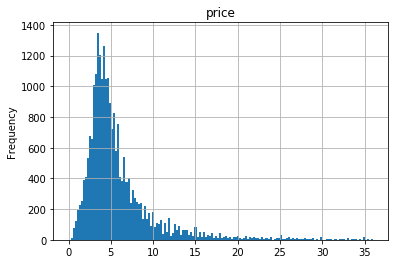

In [124]:
#Построим гистограмму на 99% данных
ax = price.plot(kind='hist', bins=150, title='price',
                   range=(price.min(), price.quantile(.99)), grid=True)

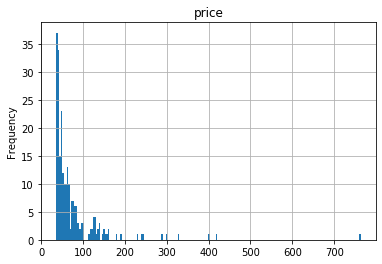

In [125]:
#Построим гистограмму на "хвосте"
ax = price.plot(kind='hist', bins=200, title='price', 
                   range=(price.quantile(.99), price.max()), grid=True)

График по всем данным показывает, что в основном цена квартир не превышает примерно 11 млн. Это подтвержается, если посмотреть на состав значений, использую quantile(), видно, что 90% данных лежит в пределах до 10.9 млн.

Далее можно приблизительно выделить сегменты:
- 11-17 млн, 
- 17-70 млн, 
- 70-100 млн - вероятно, более престижные квартиры, так как есть новый пик на 70, 
- 110-160, 
- выбросы (160-180, 230-250, 290-300, 320, 400-420, 770).

#### Исследование столбца rooms

In [126]:
#Посмотрим на распределение данных
df.rooms.quantile([.5, .6, .7, .8, .9, .95, .99])

0.50    2.0
0.60    2.0
0.70    3.0
0.80    3.0
0.90    3.0
0.95    4.0
0.99    5.0
Name: rooms, dtype: float64

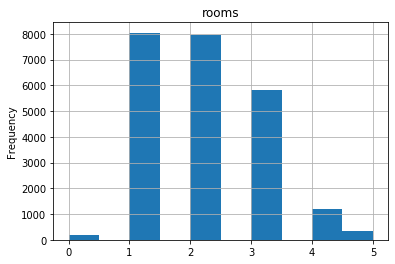

In [127]:
#Построим гистограмму на 99% данных
ax = df.rooms.plot(kind='hist', title='rooms', bins=10, range=(df.rooms.min(), df.rooms.quantile(.99)), grid=True)

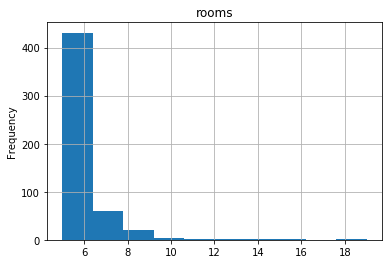

In [128]:
#Построим гистограмму на "хвосте"
ax = df.rooms.plot(kind='hist', title='rooms', bins=10, range=(df.rooms.quantile(.99), df.rooms.max()), grid=True)

График по всем данным показывает, что в основном в квартирах не более 4х комнат, при это 90% квартир имеют не более 3х. Далее мы видим новый пик на 6 комнатах, что, вероятно показывает другой тип квартир или определенное местоположение. 

#### Исследование столбца ceiling_height

In [129]:
#Посмотрим на распределение данных
df.ceiling_height.quantile([.8, .9, .95, .99])

0.80    2.80
0.90    3.00
0.95    3.20
0.99    3.63
Name: ceiling_height, dtype: float64

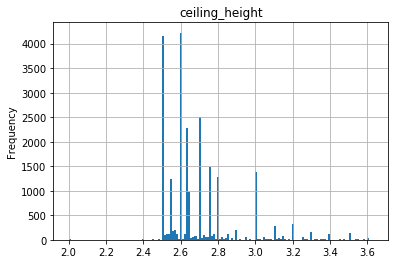

In [130]:
#Построим гистограмму на 99% данных
ax = df.ceiling_height.plot(kind='hist', title='ceiling_height', bins=150, 
                       range=(2, df.ceiling_height.quantile(.99)), grid=True)

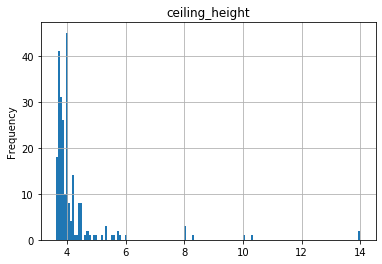

In [131]:
#Построим гистограмму на "хвосте"
ax = df.ceiling_height.plot(kind='hist', title='ceiling_height', bins=150, 
                       range=(df.ceiling_height.quantile(.99), df.ceiling_height.max()), grid=True)

График по всем данным показывает, что в основном высота потолков не превышает примерно 3 метров 90% данных). Далее идут квартиры с потолками до примерно до 4,3. Потом - до 6, и дальше находятся выбросы, природа которых не очень понятна. 

### 2. Время продажи квартир

In [132]:
#Посмотрим на базовую статистику и персентили
df.days_exposition.describe()
df.days_exposition.quantile([0.005, .01, .05, .1, .15, .85, .90, .95, .99])

#Выведем для наглядности медиану и среднее
print('Среднее:', df.days_exposition.mean())
print('Медиана:', df.days_exposition.median())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

0.005       3.00
0.010       4.00
0.050       9.00
0.100      17.00
0.150      26.00
0.850     364.00
0.900     460.00
0.950     647.00
0.990    1068.66
Name: days_exposition, dtype: float64

Среднее: 180.88863436982163
Медиана: 95.0


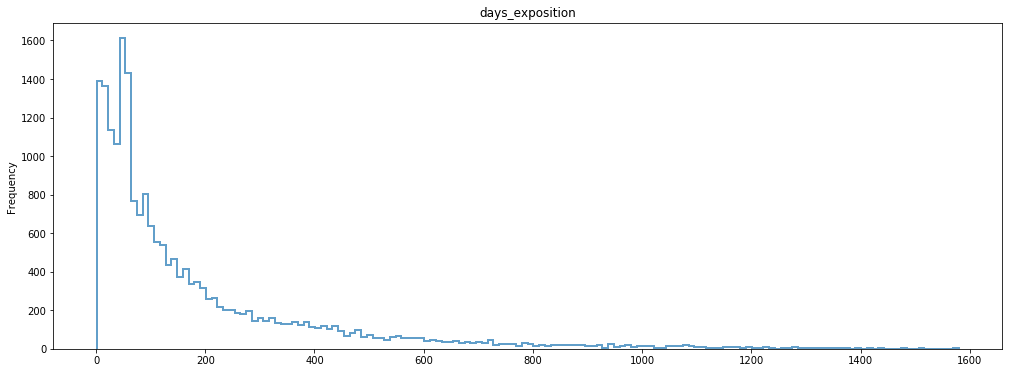

In [133]:
#Построим гистограмму 
df.days_exposition.plot(kind='hist', histtype='step', bins=150, linewidth=2, alpha=0.7, 
                        title='days_exposition', figsize=(17, 6))

<Figure size 720x360 with 0 Axes>

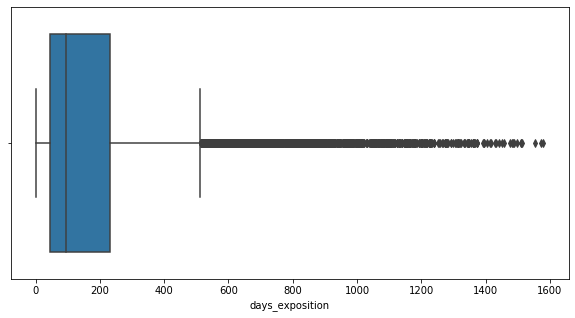

In [134]:
#Построим диаграмму размаха, чтобы определить выбросы и посмотреть распределение данных по квартилям
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=df.days_exposition, orient='h')
plt.show()

В среднем квартира продается 180 дней, при этом медиана сильно ниже - 95 дней, 99% квартир продаются не дольше 1068 дней.
Минимальный срок - всего один день, а максимальный - 1580 дней (больше четырех лет). Диаграмма размаха показывает, что медиана смещена к началу, что означает - большее количество продаж происходит за более короткий срок. Основная часть продаж происходит примерно за 50-220 дней (площадь "ящика"). 
Таким образом, можно посчитать, что время продаж, которое находится выше верхнего "уса" диграммы является сверх длинным.
Внизу выбросов нет, так как нет отрицательных значений. Следовательно, для поиска сверхкороткого времени надо будет тщательнее исследовать гистограмму на данных до медианы.


In [135]:
#Найдем сверхдолгие значения
iqr = df.days_exposition.quantile(.75) - df.days_exposition.quantile(.25)
too_long = df.days_exposition.quantile(.75) + 1.5*iqr
print('Сверхдлинные продажи длятся более', too_long)


Сверхдлинные продажи длятся более 512.5


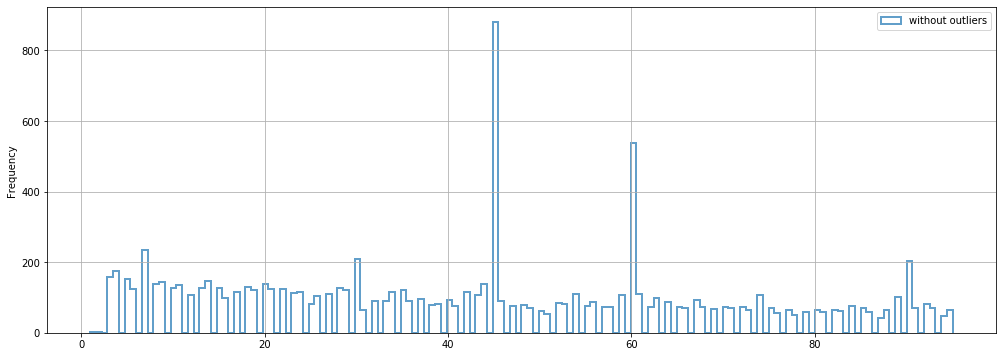

In [136]:
#Построим гистограмму данные до медианы
df.days_exposition.plot(kind='hist', histtype='step', bins=150, 
                        range=(df.days_exposition.min(), df.days_exposition.median()), 
                        linewidth=2, alpha=0.7, label='without outliers',
                        grid=True, legend=True, figsize=(17, 6))

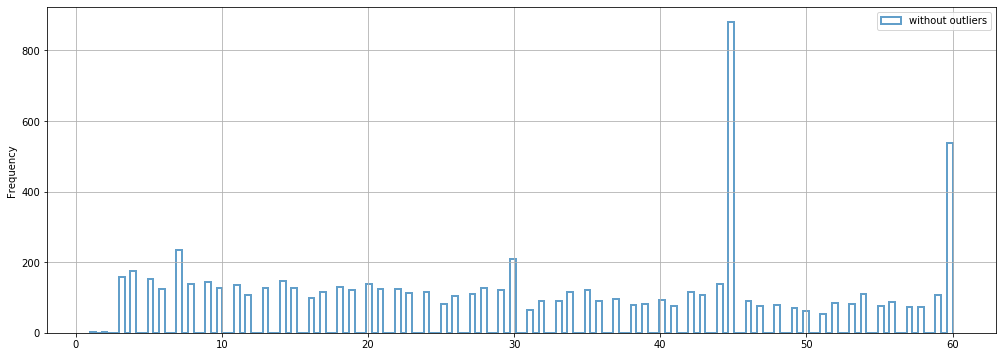

In [137]:
#И еще более подробную до 35 персентиля
df.days_exposition.plot(kind='hist', histtype='step', bins=150, 
                        range=(df.days_exposition.min(), df.days_exposition.quantile(.35)), 
                        linewidth=2, alpha=0.7, label='without outliers',
                        grid=True, legend=True, figsize=(17, 6))

Гистограммы показывают два существенных пика на 45 и 60 днях продажи, что может быть связано с какими-то официальными сроками (например, по договору через агентство). Кроме этих пиков, распределение похоже на распределение Пуассона. 
Очевидный "провал" в длительности продаж - на 2х днях. Примем это значение за сверхкороткие продажи.

Такие образом, **сверхдлинные продажи - более 512 дней**, **сверхкороткие - меньше 3х** (это 0.005 персентиль).

#### Уберем редкие и выбивающиеся значения и сравним с исходными данными

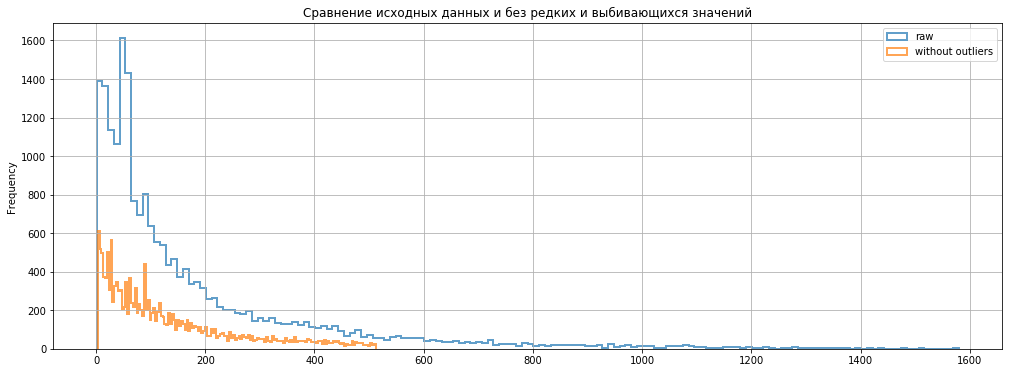

In [138]:
#Сделаем срез данных, где срок продажи не равен 45 или 60 дням, больше или равен 3 и меньше 512. 
#Для этого переведем сначала уберем NaN и переведем значения в int
days = df[df['days_exposition'].notnull() == True]['days_exposition'] 
days = days.astype(int)
no_outliers=days[(days>=3) & (days!=45) & (days!=60) & (days<=512)]

#Сравним две гистограммы - по всем данным и исключив сверхдлинные, сверхкороткие и выбивающиеся значения 
ax = df.days_exposition.plot(kind='hist', histtype='step', bins=150, 
                             linewidth=2, alpha=0.7, label='raw', legend=True)
no_outliers.plot(kind='hist', histtype='step', bins=150, 
                 title='Сравнение исходных данных и без редких и выбивающихся значений', 
                 linewidth=2, alpha=0.7, label='without outliers', ax=ax, 
                 grid=True, legend=True, figsize=(17, 6))

In [139]:
#Еще раз посмотрим статистику
df.days_exposition.describe()
no_outliers.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

count    17427.000000
mean       135.134848
std        124.219486
min          3.000000
25%         37.000000
50%         93.000000
75%        195.000000
max        512.000000
Name: days_exposition, dtype: float64

**Вывод**

Мы видим, что гистограммы существенно различаются, что вполне соответствует тому, что размах "очищенных данных" сократился. Статистика показала, что среднее время продажи уменьшилось с 180 до 135 дней, а медианное - только с 95 на 93, что вероятно показывает, что мы не выкинули лишнего. 

### 3. Что влияет на стоимость квартиры?

Проанализируем, какие факторы больше всего влияют на стоимость квартиры. Изучим зависимость цены от:
   - квадратного метра, 
   - числа комнат, 
   - удалённости от центра, 
   - от того, на каком этаже расположена квартира (первом, последнем или другом); 
   - от даты размещения: дня недели, месяца и года;

#### Числовые данные - квадратный метр, количество комнат, расстояние до центра

In [140]:
#Выделим названия столбцов для создания матрицы корреляций и построим её
col_corr_features = ['last_price', 'square_metre_price', 'rooms', 'cityCenters_nearest']
df[col_corr_features].corr()

,last_price,square_metre_price,rooms,cityCenters_nearest
last_price,1.000000,0.736499,0.363343,-0.268233
square_metre_price,0.736499,1.000000,0.055419,-0.478493
rooms,0.363343,0.055419,1.000000,-0.197280
cityCenters_nearest,-0.268233,-0.478493,-0.197280,1.000000


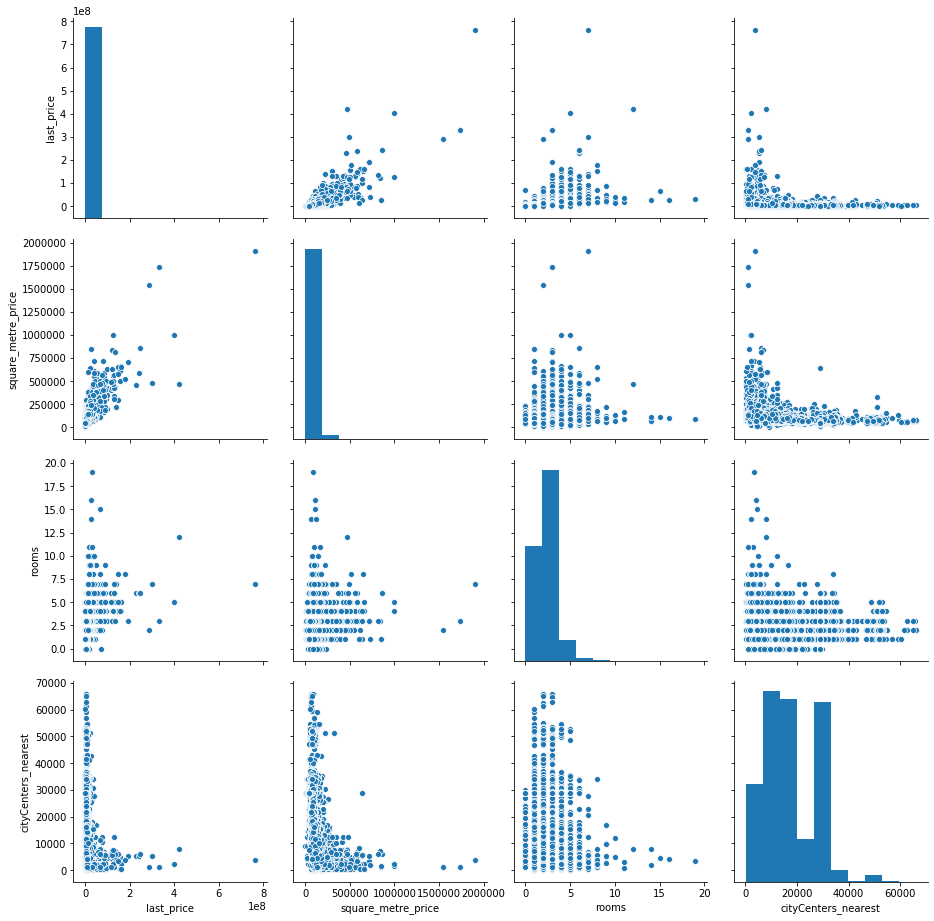

In [141]:
#Построим график отношений
ax = sns.pairplot(df[col_corr_features], height=3.2)

Коэффициенты корреляции и графики показывают, что 
- есть положительная корреляция выше средней между ценой квартиры и ценой на квадратный метр (0.74);
- есть слабая положительная корреляции между ценой и количеством комнат (0.36);
- есть слабая отрицательная корреляция между ценой и местоположением - чем дальше от центра, тем ниже цена (-0.27).

#### Категориальные данные

#### Год

<Figure size 936x360 with 0 Axes>

[(0, 36000000)]

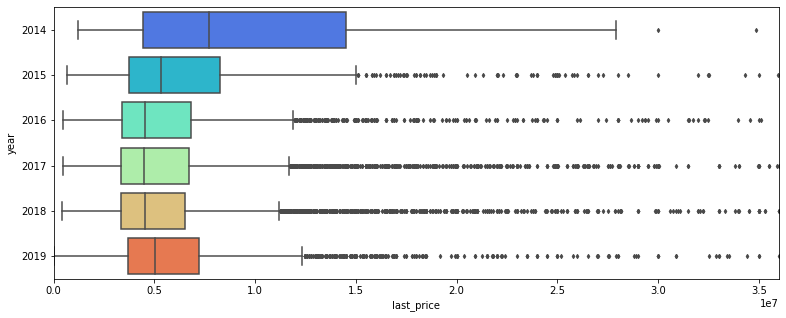

In [142]:
#Построим boxplot для сравнения цен относительно года
plt.figure(figsize=(13, 5))
g = sns.boxplot(x='last_price', y='year', data=df, fliersize=3, palette='rainbow')
g.set(xlim=(0, 36000000))

График показывает, что в 2014 году были наиболее высокие цены на квартиры, затем они снижались, в 2016-2018 были примерно на одном уровне и с 2019 года начали расти. Возможно данные за 2014 имеют какую-то особенность или были собраны неравномерно, так как они сильно выбиваются из общей картины. Вопрос можно исследовать дальше. 

#### Месяц

In [143]:
months = list(df.sort_values(by='month').month_name.unique())
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

<Figure size 936x504 with 0 Axes>

[(0, 36000000)]

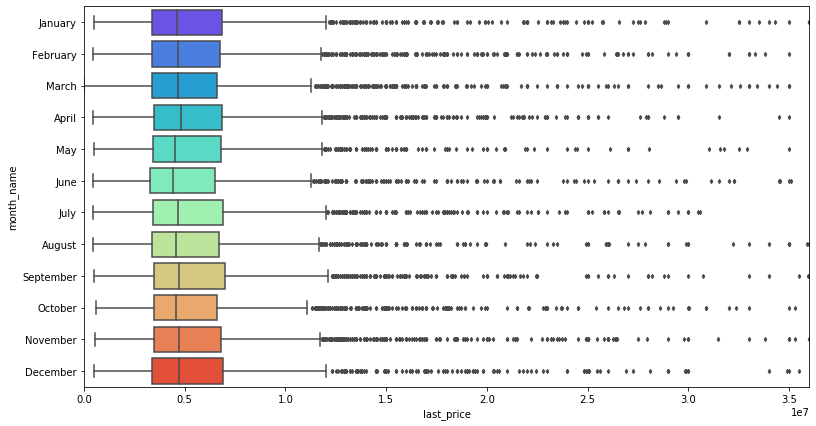

In [144]:
#Сделаем список месяцев в нужном порядке
months = list(df.sort_values(by='month').month_name.unique())

#Построим boxplot
plt.figure(figsize=(13, 7))
g = sns.boxplot(x='last_price', y='month_name', data=df, fliersize=3, palette='rainbow', order=months)
g.set(xlim=(0, 36000000))

В целом **зависимости цены от месяца не видно**, медианы расположены близко относительно друг друга.

#### День недели

<Figure size 936x360 with 0 Axes>

[(0, 36000000)]

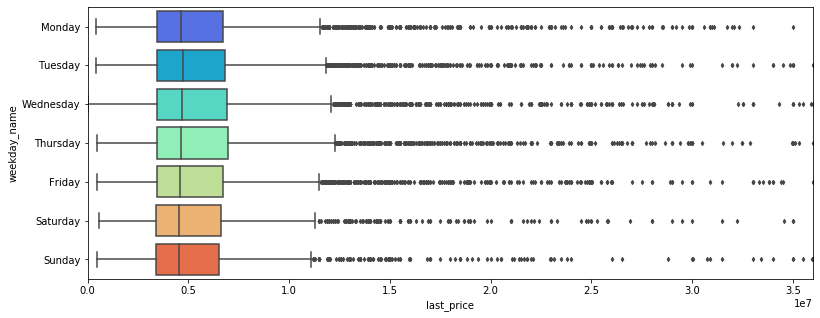

In [145]:
#Сделаем список дней недели в нужном порядке
weekdays = list(df.sort_values(by='weekday').weekday_name.unique())

#Построим boxplot
plt.figure(figsize=(13, 5))
g = sns.boxplot(x='last_price', y='weekday_name', data=df, fliersize=3, palette='rainbow', order=weekdays)
g.set(xlim=(0, 36000000))

В целом также **зависимости цены от дня недели не видно**, медианы расположены близко относительно друг друга.

#### Этаж 

<Figure size 936x216 with 0 Axes>

[(0, 36000000)]

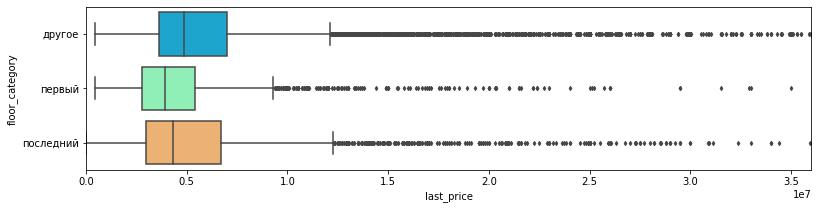

In [146]:
#Построим boxplot
plt.figure(figsize=(13, 3))
g = sns.boxplot(x='last_price', y='floor_category', data=df, fliersize=3, palette='rainbow')
g.set(xlim=(0, 36000000))

График показывает, что квартиры на первом этаже стоят дешевле, на последнем - дороже, чем на первом, но дешевле, чем на остальных этажах.
График подтверждает, что в целом **квартиры на первом и последнем этаже стоят дешевле**.

### 4. 10 населённых пунктов с наибольшим числом объявлений

In [147]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в них
top_10 = df.pivot_table(index='locality_name', values='square_metre_price', aggfunc=['count','mean'])
top_10.columns = ['number_of_ads', 'square_metre_price_mean']
top_10.sort_values(by='number_of_ads', ascending=False).head(10)

,number_of_ads,square_metre_price_mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,556,85681.305755
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [148]:
#Населённые пункты с самой высокой и низкой стоимостью жилья;
print('Самая высокая цена')
top_10.sort_values(by=('square_metre_price_mean'), ascending = False).head()
print()
print()
print('Самая низкая цена')
top_10.sort_values(by=('square_metre_price_mean'), ascending = False).tail()

Самая высокая цена


,number_of_ads,square_metre_price_mean
locality_name,,
Зеленогорск,24,115122.500000
Санкт-Петербург,15721,114848.565231
посёлок Репино,4,104238.500000
Пушкин,369,103125.373984
Сестрорецк,183,101757.163934




Самая низкая цена


,number_of_ads,square_metre_price_mean
locality_name,,
посёлок Совхозный,2,12628.5
деревня Выскатка,2,12335.0
деревня Вахнова Кара,1,11688.0
посёлок станции Свирь,2,11481.0
деревня Старополье,3,11206.0


10 нас.пунктов с **наибольшим числом объявлений**:
- Санкт-Петербург (15721)
- посёлок Мурино	(556)
- посёлок Шушары	(440)
- Всеволожск	(398)
- Пушкин	(369)
- Колпино	(338)
- посёлок Парголово (327)
- Гатчина	(307)
- деревня Кудрово	(299)
- Выборг (237)

Цена квадратного метра в них варьируется от 114848 (в Санкт-Петербурге) до 58141 (Выборг).

Самая **высокая цена** в **Зеленогорске** (115122), **Санкт-Петербурге** (114848) и **посёлке Репино** (104238).

Самая **низкая** - в **деревне Вахнова Кара** (11688), **посёлке-станции Свирь** (11481) и **деревне Старополье** (11206).

### 5. Квартиры в Санкт-Петербурге vs квартиры в центре Санкт-Петербурга

In [149]:
#Выделим квартиры в Санкт-Петербурге
spb_flats = df[df.locality_name =='Санкт-Петербург'].copy()
spb_flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 23697
Data columns (total 22 columns):
last_price              15721 non-null int64
total_area              15721 non-null float64
first_day_exposition    15721 non-null object
rooms                   15721 non-null int64
ceiling_height          15721 non-null float64
floors_total            15721 non-null int64
living_area             15721 non-null float64
floor                   15721 non-null int64
kitchen_area            15721 non-null float64
locality_name           15721 non-null category
cityCenters_nearest     15721 non-null int64
days_exposition         13638 non-null float64
living_total_ratio      15721 non-null float64
kitchen_total_ratio     15721 non-null float64
date                    15721 non-null datetime64[ns]
weekday                 15721 non-null category
weekday_name            15721 non-null category
month                   15721 non-null category
month_name              15721 non-null catego

#### Какая область входит в центр?

In [150]:
#Создадим столбец с расстоянием до центра в километрах и округлим до целых значений. 
spb_flats['to_centre_km'] = (spb_flats.cityCenters_nearest / 1000).astype(int)
spb_flats.to_centre_km.unique()

#Посчитаем среднюю цену для каждого километра
price_over_distance = spb_flats.groupby('to_centre_km')['last_price'].mean()
price_over_distance = price_over_distance.round(2)
price_over_distance

array([16, 13,  6,  8, 11, 15, 14, 10, 12,  9,  2,  3,  4,  7,  5, 21, 17,
        1, 24, 25, 23, 20,  0, 22, 18, 27, 28, 19, 26, 29])

to_centre_km
0     23442315.44
1     18850851.66
2     16163313.62
3     13436830.55
4     13632024.64
5     15306121.12
6     14389106.19
7     12797673.74
8      8445272.00
9      6426054.86
10     6376091.67
11     5977038.98
12     6349055.96
13     6022926.61
14     5769469.04
15     5545776.11
16     5527927.70
17     4865574.00
18     5334928.79
19     4678755.67
20     6365864.20
21     5183239.25
22     5425513.32
23     4126866.67
24     3862235.00
25     4014913.35
26     3575000.00
27     8300000.00
28     4910500.00
29     3833333.33
Name: last_price, dtype: float64

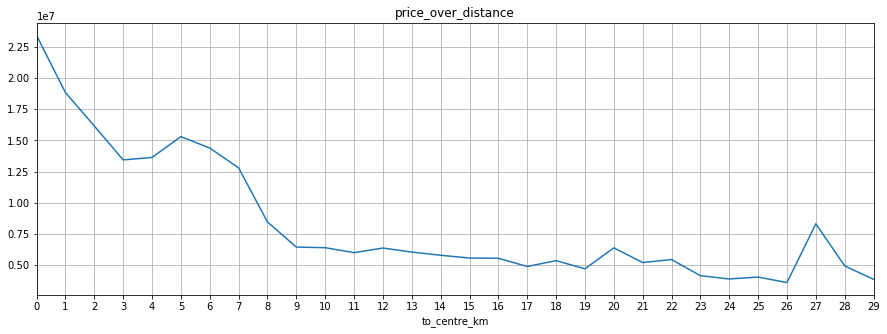

In [151]:
#Постройте график: как цена зависит от удалённости от центра (где график сильно меняется — это и будет центральная зона.) 
#Выделите сегмент квартир в центре. 
ticks = list(range(30))
price_over_distance.plot(figsize=(15,5), title='price_over_distance', grid=True, xticks=ticks)

График показывает, что рост цен начинает активно увеличиваться на **8м км**, возьмем его за границу центра.

#### Сравнение квартир в центре и по остальной части города

In [152]:
#Сделаем срезы для центра города и остального города
spb_centre = spb_flats.query('to_centre_km <= 8')
spb_not_centre = spb_flats.query('to_centre_km > 8')

#### Площадь, цена, число комнат, высота потолков

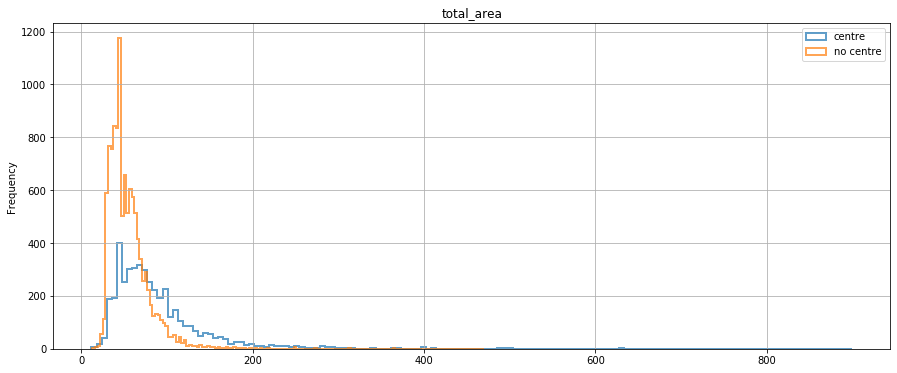

Статистика по центру


count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64

Статистика по остальной части


count    11339.000000
mean        55.546721
std         25.771950
min         13.000000
25%         39.300000
50%         49.900000
75%         64.700000
max        470.300000
Name: total_area, dtype: float64

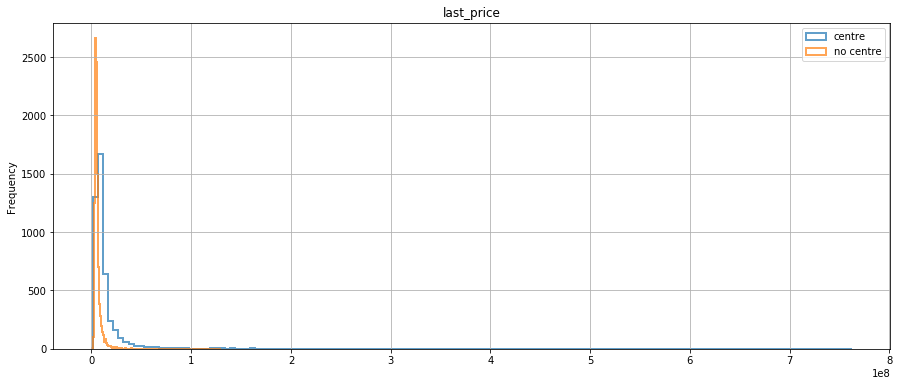

Статистика по центру


count    4.382000e+03
mean     1.376875e+07
std      2.296136e+07
min      1.600000e+06
25%      6.207104e+06
50%      8.707500e+06
75%      1.350000e+07
max      7.630000e+08
Name: last_price, dtype: float64

Статистика по остальной части


count    1.133900e+04
mean     5.857307e+06
std      3.690932e+06
min      1.219000e+04
25%      3.950000e+06
50%      4.900000e+06
75%      6.500000e+06
max      1.300000e+08
Name: last_price, dtype: float64

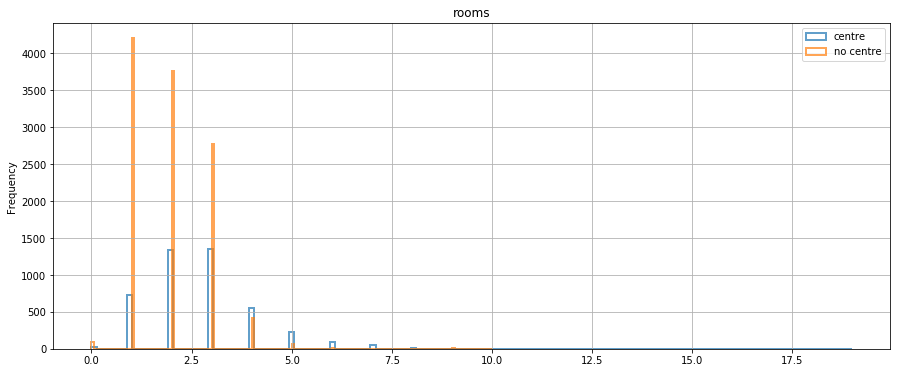

Статистика по центру


count    4382.000000
mean        2.720904
std         1.410307
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

Статистика по остальной части


count    11339.000000
mean         1.959344
std          0.947290
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

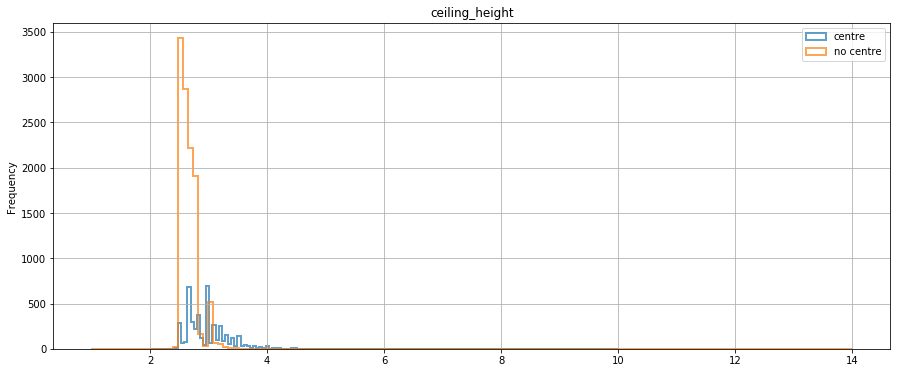

Статистика по центру


count    4382.000000
mean        2.971074
std         0.381277
min         2.000000
25%         2.650000
50%         3.000000
75%         3.160000
max        10.000000
Name: ceiling_height, dtype: float64

Статистика по остальной части


count    11339.000000
mean         2.659800
std          0.240916
min          1.000000
25%          2.550000
50%          2.640000
75%          2.730000
max         14.000000
Name: ceiling_height, dtype: float64

In [153]:
#Название необходимых столбцов у нам уже сохранено в переменно cols_hist
#Воспользуеся ей для цикла, с помощью которого построим гистограммы обеих территорий и выведем статистику
for col in cols_hist:
    ax = spb_centre[col].plot(kind='hist', histtype='step', bins=150,
                              linewidth=2, alpha=0.7,  title=col, label='centre', legend=True)
    spb_not_centre[col].plot(kind='hist', histtype='step', bins=150, title=col,
                              linewidth=2, alpha=0.7, label='no centre', ax=ax, 
                              grid=True, legend=True, figsize=(15, 6))
    plt.show()
    print('Статистика по центру')
    spb_centre[col].describe()
    print('Статистика по остальной части')
    spb_not_centre[col].describe()


#### Вывод

**Площадь**: _площадь квартир в центре больше_ (75 кв.м медиана), чем не в центре (49). Также разброс данных площади в центре больше (стан.отклонение 57 - в два раза больше, чем не в центре). В центре же находится самая большая квартира в 900 кв.м.

**Стоимость**: стоимость квартир в центре колеблется от 1.6 млн до 763 млн (самая дорогая квартира датасета), не в центре - от 1.2 млн до 130. Медиана стоимости квартир в центре - 8 млн, а в другой части города - 4.9, соответственно, _в среднем квартира в центре почти в два раза дороже_. Тут же находятся много дорогих квартир, о чем говорит повышенное среднее 13.7 млн.

**Число комнат**: _в центре_ в основном квартиры с 3мя комнатами (медиана), вне центра - с 2мя, соответственно _комнат больше_. Максимальное количество комнат в центре - 19, вне центра - 10. 

**Высота потолков**: в центре медианное значение потолков - 3м, вне центра - 2.64, соответственно, _в центре потолки выше_. Однако квартиры с самыми высокими потолками (14 м) находятся не в центре.

#### Влияние числа комнат, этажа, удалённости от центра на стоимость

In [154]:
#Выделим названия столбцов для создания матрицы корреляций и построим её
centre_features = ['last_price', 'rooms', 'floor', 'cityCenters_nearest']

print('Для центра')
spb_centre[centre_features].corr()
print()
print('Для нецентра')
spb_not_centre[centre_features].corr()

Для центра


,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.345090,0.106710,-0.100291
rooms,0.345090,1.000000,-0.054891,-0.227548
floor,0.106710,-0.054891,1.000000,0.254567
cityCenters_nearest,-0.100291,-0.227548,0.254567,1.000000



Для нецентра


,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.490818,0.113934,-0.109881
rooms,0.490818,1.000000,-0.127543,-0.044115
floor,0.113934,-0.127543,1.000000,0.052162
cityCenters_nearest,-0.109881,-0.044115,0.052162,1.000000


#### Вывод

В целом коэффициенты корреляции почти не отличаются. Корреляции между ценой и этажом и удаленностью слабые. *Положительная корреляция между стоимостью квартиры и количеством комнат (0.49) для нецентра выражена сильнее, чем в центре (0.34)*. 

#### Влияние даты размещения объявления на стоимость

In [155]:
#Создадим отдельный датафрей, добавим столбец категории центр/не центр
spb_flats_date = spb_flats[['date', 'month_name', 'weekday_name', 'year', 'last_price', 'to_centre_km']].copy()

def cent_dist(col):
    '''
    Функция принимает значение столбца и сравнивает его с определенными рамками значений
    '''
    if col <= 8:
        return 'центр'
    else:
        return 'не центр'

spb_flats_date['centre_category'] = spb_flats_date.to_centre_km.apply(cent_dist).astype('category')    

#Посмотрим
spb_flats_date.head()

,date,month_name,weekday_name,year,last_price,to_centre_km,centre_category
0,2019-03-07,March,Thursday,2019,13000000,16,не центр
2,2015-08-20,August,Thursday,2015,5196000,13,не центр
3,2015-07-24,July,Friday,2015,64900000,6,центр
4,2018-06-19,June,Tuesday,2018,10000000,8,центр
7,2019-04-18,April,Thursday,2019,7915000,11,не центр


#### Год

<Figure size 936x504 with 0 Axes>

[(0, 36000000)]

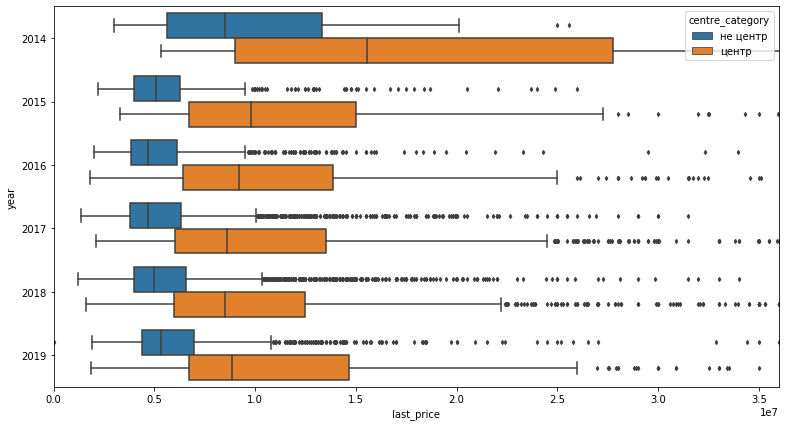

In [156]:
#Построим boxplot для сравнения цен относительно года
plt.figure(figsize=(13, 7))
g = sns.boxplot(x='last_price', y='year', data=spb_flats_date, fliersize=3, hue='centre_category')
g.set(xlim=(0, 36000000))

В целом разницы не видно, а зависимости те же, что на всех данных - высокие цены в 2014 году, затем спад и небольшой рост в 2019. 

#### Месяц

<Figure size 936x720 with 0 Axes>

[(0, 36000000)]

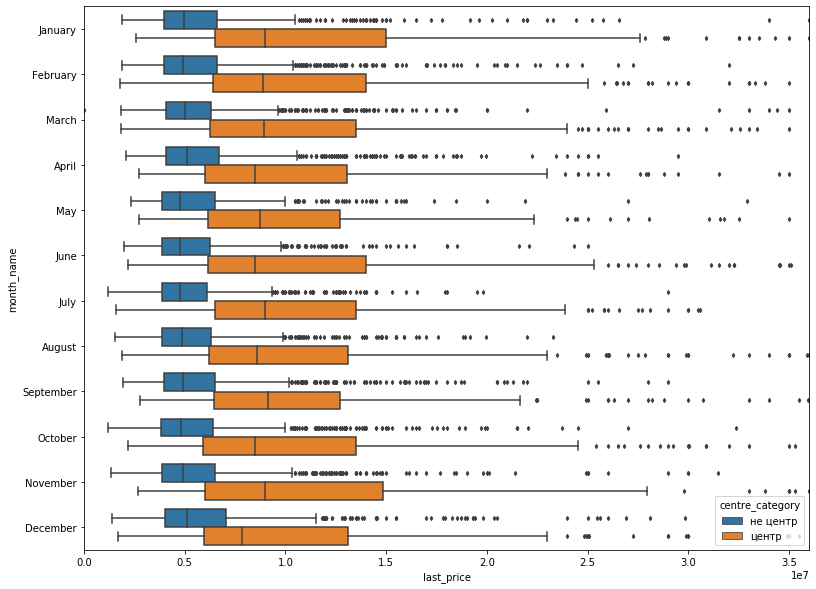

In [157]:
#Построим boxplot
plt.figure(figsize=(13, 10))
g = sns.boxplot(x='last_price', y='month_name', data=spb_flats_date, fliersize=3, 
                hue='centre_category', order=months)
g.set(xlim=(0, 36000000))

Видна небольшая разница в варьировании медианных значений в зависимости от месяца - в центре они варьируются больше, и в апреле, июне, октябре и декабре медианная стоимость несколько ниже, чем в остальных месяцах.

#### День недели

<Figure size 936x504 with 0 Axes>

[(0, 36000000)]

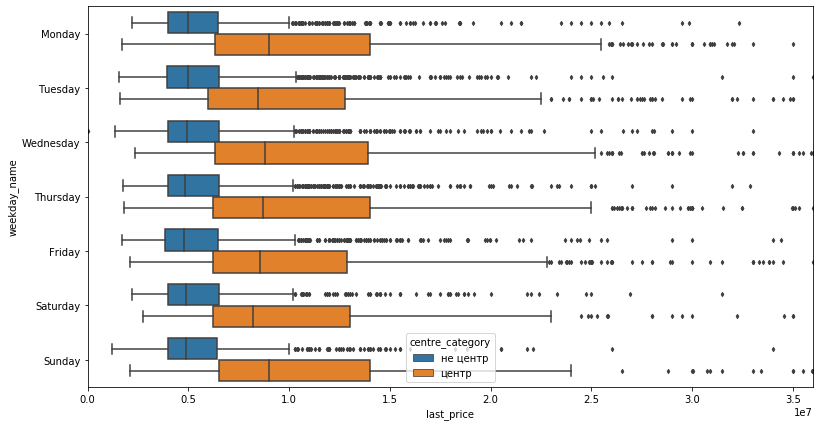

In [158]:
#Построим boxplot
plt.figure(figsize=(13, 7))
g = sns.boxplot(x='last_price', y='weekday_name', data=spb_flats_date, fliersize=3, 
                hue='centre_category', order=weekdays)
g.set(xlim=(0, 36000000))

Зависимости цены от дня недели не видно, медианы расположены близко относительно друг друга, хотя в центре они варьируются немного больше, чем не в центре. Во вторник и в субботу медианная стоимость в центре чуть ниже.

### Шаг 5. Общий вывод

Был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет с целью научиться определять рыночную стоимость объектов недвижимости и определить параметры для построения автоматизированной системы, которая отследит аномалии и мошенническую деятельность.

После предварительного осмотра данных были:
- выделены необходимые столбцы и сохранены в отдельный датафрейм;
- определены столбцы с отсутствующими значениями и заполнены пропуски (медианами с применением группировок данных);
- добавлены необходимые столбцы (date, weekday, month, year, floor_category, square_metre_price, price_per_km, living_total_ratio, kitchen_total_ratio)
- произведены замены типов данных (locality_name, weekday, month, year, floor_category - на тип category; first_day_exposition - в datetime; last_price, floors_total, cityCenters_nearest - на int);
- построены гистограммы и изучены следующие параметры: площадь, цена, число комнат, высота потолков;
- изучено время продажи квартиры и определены очень быстрые и долгие продажи;
- определены, какие факторы больше всего влияют на стоимость квартиры;
- определены 10 населённых пунктов с наибольшим числом объявлений, с самой высокой и низкой стоимостью жилья;
- определена центральная область Санкт-Петербурга и изучен сегмент квартир в ней;
- прозведено сравнение факторов, которые влияют на стоимость квартиры в центре и вне центра города.


**Вывод**

1. По всем данным
   - площадь: 99% данных лежит в пределах от 12 до 197 кв. метров, при этом малое количество квартир уже имеют площадь более 125 кв. метров (95% квартир имеют площадь не более 116 кв.м). На графике видно, что значения "вытягиваются" вправо и в основном обрываются после 520 кв.м - срез данных показывает, что это многокомнатные квартиры (от 7ми комнат).
   - цена: 90% данных лежит в пределах до 10.9 млн, далее идут сегменты: 11-17 млн, 17-70 млн, 70-100 млн, 110-160, и выбросы (160-180, 230-250, 290-300, 320, 400-420, 770).
   - число комнат: 90% квартир имеют потолки не более 3х комнат. Далее идет пик на 6 комнатах, что, вероятно показывает другой тип квартир или определенное местоположение.
   - высота потолков: 90% данных не превышает примерно 3 метров. Далее идут квартиры с потолками до примерно до 4,3. Потом - до 6, и дальше находятся выбросы, природа которых не очень понятна.


2. Время продажи:
   - среднее - 180 дней,  
   - медиана - 95 дней, 
   - очень быстрые - меньше 3х дней
   - долгие продажи- более 512 дней
   - Особенности после удаления выбросов и пиков: гистограммы времени продажи существенно различаются, что соответствует тому, что размах "очищенных данных" сократился. Среднее время продажи уменьшилось с 180 до 135 дней, а медианное - только с 95 на 93.


3. Больше всего влияют на стоимость квартиры: цена на квадратный метр (0.74 - корреляция выше средней), количество комнат (0.36 - слабая корреляция), местоположение (-0.27 - слабая отрицательная). 
Дата размещения: в 2014 году были наиболее высокие цены на квартиры, затем они снижались, в 2016-2018 были примерно на одном уровне и с 2019 года начали расти. Возможно данные за 2014 имеют какую-то особенность и требуют дальнейшего исследования. Зависимости цены от месяца или дня недели не выявлено, медианы расположены близко относительно друг друга.
Этаж: квартиры на первом этаже стоят дешевле, на последнем - дороже, чем на первом, но дешевле, чем на остальных этажах. В целом квартиры на первом и последнем этаже стоят дешевле.


4. По населенным пунктам:
   - 10 населённых пунктов с наибольшим числом объявлений (цена кв. метра варьируется от 114848 (в Санкт-Петербурге) до 58141 (Выборге), 
      -  Санкт-Петербург (15721)
      -  посёлок Мурино (556)
      -  посёлок Шушары (440)
      -  Всеволожск (398)
      -  Пушкин (369)
      -  Колпино (338)
      -  посёлок Парголово (327)
      - Гатчина (307)
      -  деревня Кудрово (299)
      -  Выборг (237)
   - самая высокая цена в Зеленогорске (115122), Санкт-Петербурге (114848) и посёлке Репино (104238)  
   - низкой стоимостью жилья - в деревне Вахнова Кара (11688), посёлке-станции Свирь (11481) и деревне Старополье (11206);


5. Квартиры в центре Санкт-Петербурга: 
   - была определена граница на 8ми км;
   - По сравнению с остальными квартирами в городе:
       - *Площадь*: площадь квартир в центре больше (75 кв.м медиана), чем не в центре (49). Также разброс данных площади в центре больше (стан.отклонение 57 - в два раза больше, чем не в центре). В центре же находится самая большая квартира в 900 кв.м.

       - *Стоимость*: стоимость квартир в центре колеблется от 1.6 млн до 763 млн (самая дорогая квартира датасета), не в центре - от 1.2 млн до 130. Медиана стоимости квартир в центре - 8 млн, а в другой части города - 4.9, соответственно, в среднем квартира в центре почти в два раза дороже. Тут же находятся много дорогих квартир, о чем говорит повышенное среднее 13.7 млн.

       - *Число комнат*: в центре в основном квартиры с 3мя комнатами (медиана), вне центра - с 2мя, соответственно комнат больше. Максимальное количество комнат в центре - 19, вне центра - 10.

       - *Высота потолков*: в центре медианное значение потолков - 3м, вне центра - 2.64, соответственно, в центре потолки выше. Однако квартиры с самыми высокими потолками (14 м) находятся не в центре.

       - *Дата размещения*: зависимости от года те же, что на всех данных - высокие цены в 2014 году, затем спад и небольшой рост в 2019. Видна небольшая разница в варьировании медианных значений в зависимости от месяца - в центре они варьируются больше, и в апреле, июне, октябре и декабре медианная стоимость несколько ниже, чем в остальных месяцах. Зависимости цены от дня недели не видно, медианы расположены близко относительно друг друга, хотя в центре они варьируются немного больше, чем не в центре. Во вторник и в субботу медианная стоимость в центре чуть ниже.